# Burak Nur Erdem
# IE360 Homework 4
## Forecasting Turkey's Electricity Consumption

## Table of Contents
#### 1. Introduction 
#### 2. Data Manipulation and Interpreting
#### 3. Questioning Stationarity and Further Data Manipulation
#### 4. Building Models, Forecasting and Accuracy
#### 5. Conclusion

# 1. Introduction

In this homework, I am expected to stationarize the daily electricity consumption of Turkey between 1 January 2017 and 8 January 2021, then to forecast the daily consumption between 9 January 2021 and 23 January 2021 using autoregressive and moving average models. The process required moderate data manupulation and some assumptions which are mentioned along the way. The data is provided by the Energy Exchange Istanbul Transparency Platform.

# 2. Data Manipulation and Interpreting

First of all, the provided data is hourly. I summed up the hourly values into daily basis. Necessary adjustments such as changing value types, changing column names are made. Then, I plotted the daily consumption values over time to roughly interpret what the data looks like and to see the structure of outliers. As we have discussed in the class, there are downward spikes in the times of religious holidays. I could have say they were below the 5% quantile; however, as it can be seen on the plot the Covid-19 period also lies below the line. So, I manually changed the religious holidays' values to values of the same weekday's before the holidays, counting the connected weekends where the consumption values were below expectations. This baseline approach is not very problematic, because usually the electricity consumption values don't increase or decrease drastically in short times. Basically, the assumption is that if it weren't for a religious holiday, the values wouldn't be very different from what they were in the week before.

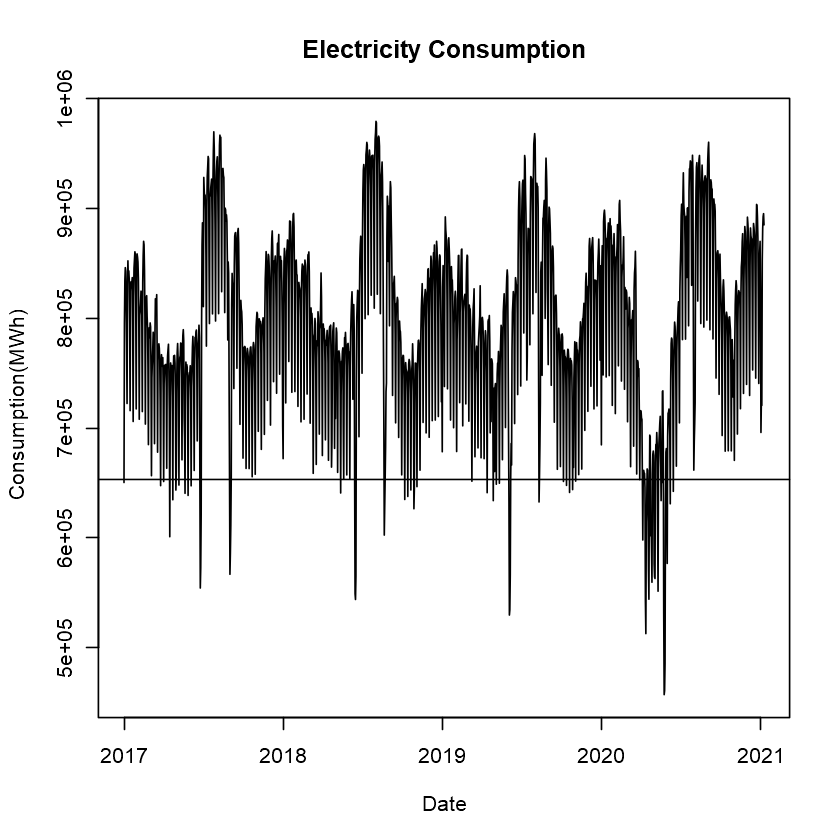

In [1]:
suppressWarnings(suppressMessages(library(data.table)))
suppressWarnings(suppressMessages(library(forecast)))

consump = fread("RealTimeConsumption.csv")
colnames(consump) = c("Date", "Hour", "Consumption")

consump[,Date:=as.Date(consump[,Date], format = "%d.%m.%Y")]
consump[,Consumption:=gsub(',','',Consumption)]
consump[,Consumption:=as.numeric(consump[,Consumption])]

dailycons = consump[,list(DailyConsumption = sum(Consumption)), by = list(Date)]





plot(x=dailycons$Date,y=dailycons$DailyConsumption, type="l",
     ylab="Consumption(MWh)", xlab="Date", main = "Electricity Consumption")
abline(h = quantile(x = dailycons$DailyConsumption, probs = 0.05))

In [2]:
# 2017 Ramazan Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2017-06-16") & Date<=as.Date("2017-06-30") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2017-06-24") , DailyConsumption:=dailycons[Date == as.Date("2017-06-17") , DailyConsumption]]
dailycons[Date == as.Date("2017-06-25") , DailyConsumption:=dailycons[Date == as.Date("2017-06-18") , DailyConsumption]]
dailycons[Date == as.Date("2017-06-26") , DailyConsumption:=dailycons[Date == as.Date("2017-06-19") , DailyConsumption]]
dailycons[Date == as.Date("2017-06-27") , DailyConsumption:=dailycons[Date == as.Date("2017-06-20") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2017-06-16") & Date<=as.Date("2017-06-30") ,DailyConsumption], type="l")


# 2017 Kurban Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2017-08-24") & Date<=as.Date("2017-09-15") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2017-08-31") , DailyConsumption:=dailycons[Date == as.Date("2017-08-24") , DailyConsumption]]
dailycons[Date == as.Date("2017-09-01") , DailyConsumption:=dailycons[Date == as.Date("2017-08-25") , DailyConsumption]]
dailycons[Date == as.Date("2017-09-02") , DailyConsumption:=dailycons[Date == as.Date("2017-08-26") , DailyConsumption]]
dailycons[Date == as.Date("2017-09-03") , DailyConsumption:=dailycons[Date == as.Date("2017-08-27") , DailyConsumption]]
dailycons[Date == as.Date("2017-09-04") , DailyConsumption:=dailycons[Date == as.Date("2017-08-28") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2017-08-24") & Date<=as.Date("2017-09-15") ,DailyConsumption], type="l")


# 2018 Ramazan Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2018-06-08") & Date<=as.Date("2018-06-22") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2018-06-14") , DailyConsumption:=dailycons[Date == as.Date("2018-06-07") , DailyConsumption]]
dailycons[Date == as.Date("2018-06-15") , DailyConsumption:=dailycons[Date == as.Date("2018-06-08") , DailyConsumption]]
dailycons[Date == as.Date("2018-06-16") , DailyConsumption:=dailycons[Date == as.Date("2018-06-09") , DailyConsumption]]
dailycons[Date == as.Date("2018-06-17") , DailyConsumption:=dailycons[Date == as.Date("2018-06-10") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2018-06-08") & Date<=as.Date("2018-06-22") ,DailyConsumption], type="l")


# 2018 Kurban Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2018-08-01") & Date<=as.Date("2018-08-30") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2018-08-18") , DailyConsumption:=dailycons[Date == as.Date("2018-08-11") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-19") , DailyConsumption:=dailycons[Date == as.Date("2018-08-12") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-20") , DailyConsumption:=dailycons[Date == as.Date("2018-08-13") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-21") , DailyConsumption:=dailycons[Date == as.Date("2018-08-14") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-22") , DailyConsumption:=dailycons[Date == as.Date("2018-08-15") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-23") , DailyConsumption:=dailycons[Date == as.Date("2018-08-16") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-24") , DailyConsumption:=dailycons[Date == as.Date("2018-08-17") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-25") , DailyConsumption:=dailycons[Date == as.Date("2018-08-11") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-26") , DailyConsumption:=dailycons[Date == as.Date("2018-08-12") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2018-08-01") & Date<=as.Date("2018-08-30") ,DailyConsumption], type="l")


# 2019 Ramazan Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2019-05-18") & Date<=as.Date("2019-06-15") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2019-06-01") , DailyConsumption:=dailycons[Date == as.Date("2019-05-25") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-02") , DailyConsumption:=dailycons[Date == as.Date("2019-05-26") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-03") , DailyConsumption:=dailycons[Date == as.Date("2019-05-27") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-04") , DailyConsumption:=dailycons[Date == as.Date("2019-05-28") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-05") , DailyConsumption:=dailycons[Date == as.Date("2019-05-29") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-06") , DailyConsumption:=dailycons[Date == as.Date("2019-05-30") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-07") , DailyConsumption:=dailycons[Date == as.Date("2019-05-31") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-08") , DailyConsumption:=dailycons[Date == as.Date("2019-05-25") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-09") , DailyConsumption:=dailycons[Date == as.Date("2019-05-26") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2019-05-18") & Date<=as.Date("2019-06-15") ,DailyConsumption], type="l")


# 2019 Kurban Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2019-08-03") & Date<=as.Date("2019-08-31") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2019-08-10") , DailyConsumption:=dailycons[Date == as.Date("2019-08-03") , DailyConsumption]]
dailycons[Date == as.Date("2019-08-11") , DailyConsumption:=dailycons[Date == as.Date("2019-08-04") , DailyConsumption]]
dailycons[Date == as.Date("2019-08-12") , DailyConsumption:=dailycons[Date == as.Date("2019-08-05") , DailyConsumption]]
dailycons[Date == as.Date("2019-08-13") , DailyConsumption:=dailycons[Date == as.Date("2019-08-06") , DailyConsumption]]
dailycons[Date == as.Date("2019-08-14") , DailyConsumption:=dailycons[Date == as.Date("2019-08-07") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2019-08-03") & Date<=as.Date("2019-08-31") ,DailyConsumption], type="l")


# 2020 Ramazan Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2020-05-15") & Date<=as.Date("2020-05-29") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2020-05-23") , DailyConsumption:=dailycons[Date == as.Date("2020-05-16") , DailyConsumption]]
dailycons[Date == as.Date("2020-05-24") , DailyConsumption:=dailycons[Date == as.Date("2020-05-17") , DailyConsumption]]
dailycons[Date == as.Date("2020-05-25") , DailyConsumption:=dailycons[Date == as.Date("2020-05-18") , DailyConsumption]]
dailycons[Date == as.Date("2020-05-26") , DailyConsumption:=dailycons[Date == as.Date("2020-05-19") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2020-05-15") & Date<=as.Date("2020-05-29") ,DailyConsumption], type="l")


# 2020 Kurban Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2020-07-23") & Date<=as.Date("2020-08-10") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2020-07-30") , DailyConsumption:=dailycons[Date == as.Date("2020-07-23") , DailyConsumption]]
dailycons[Date == as.Date("2020-07-31") , DailyConsumption:=dailycons[Date == as.Date("2020-07-24") , DailyConsumption]]
dailycons[Date == as.Date("2020-08-01") , DailyConsumption:=dailycons[Date == as.Date("2020-07-25") , DailyConsumption]]
dailycons[Date == as.Date("2020-08-02") , DailyConsumption:=dailycons[Date == as.Date("2020-07-26") , DailyConsumption]]
dailycons[Date == as.Date("2020-08-03") , DailyConsumption:=dailycons[Date == as.Date("2020-07-27") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2020-07-23") & Date<=as.Date("2020-08-10") ,DailyConsumption], type="l")

<br>
As it can be seen clearly in the plot below, correcting the values of the religious holidays made the graph much smoother. We can say that we are free of drastically different outliers. However, the data still needs some adjustments to say that it is stationary.
<br><br>

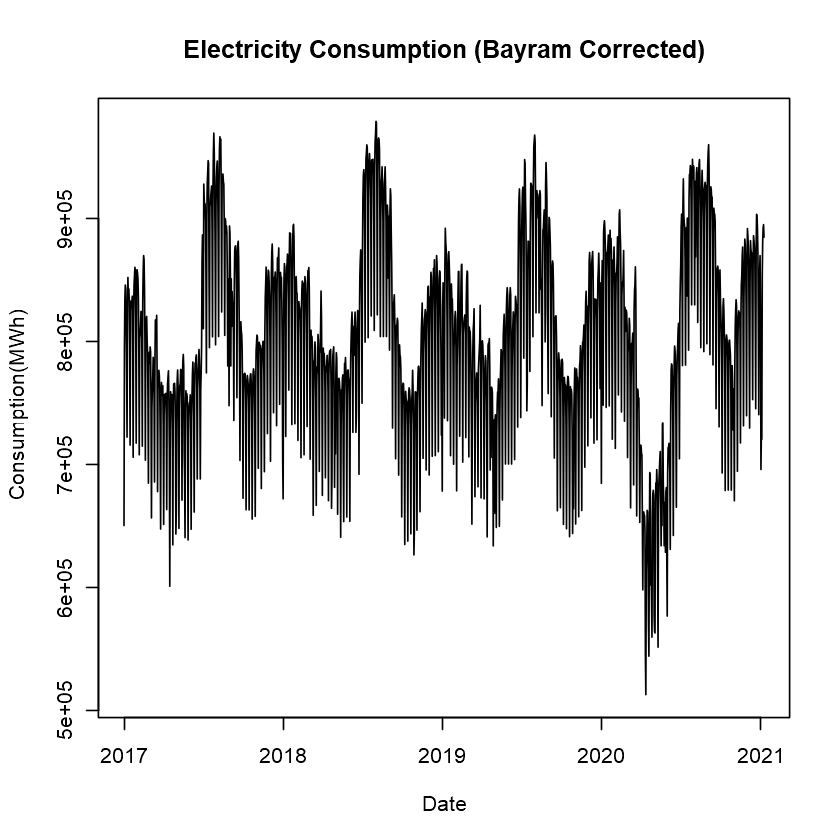

In [3]:
plot(x=dailycons$Date,y=dailycons$DailyConsumption, type="l",
     ylab="Consumption(MWh)", xlab="Date", main = "Electricity Consumption (Bayram Corrected)")

# 3. Questioning Stationarity and Further Data Manipulation
<br>
KPSS unit root test is used to determine if a series requires differencing. Below, I applied the test to daily consumption series. Suprisingly, the value of the test statistic is lower than the critical levels. However, I still believe that differencing the series with 7 lags will make the series more stationary. so I took the differenced series and plotted it. I also tested KPSS test on the differenced series which didnt yield any significant results.
<br><br>

In [4]:
suppressWarnings(suppressMessages(library(urca)))

dailycons$DailyConsumption %>% ur.kpss() %>% summary()
diff(dailycons$DailyConsumption, lag = 7) %>% ur.kpss() %>% summary()



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.1712 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.03 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


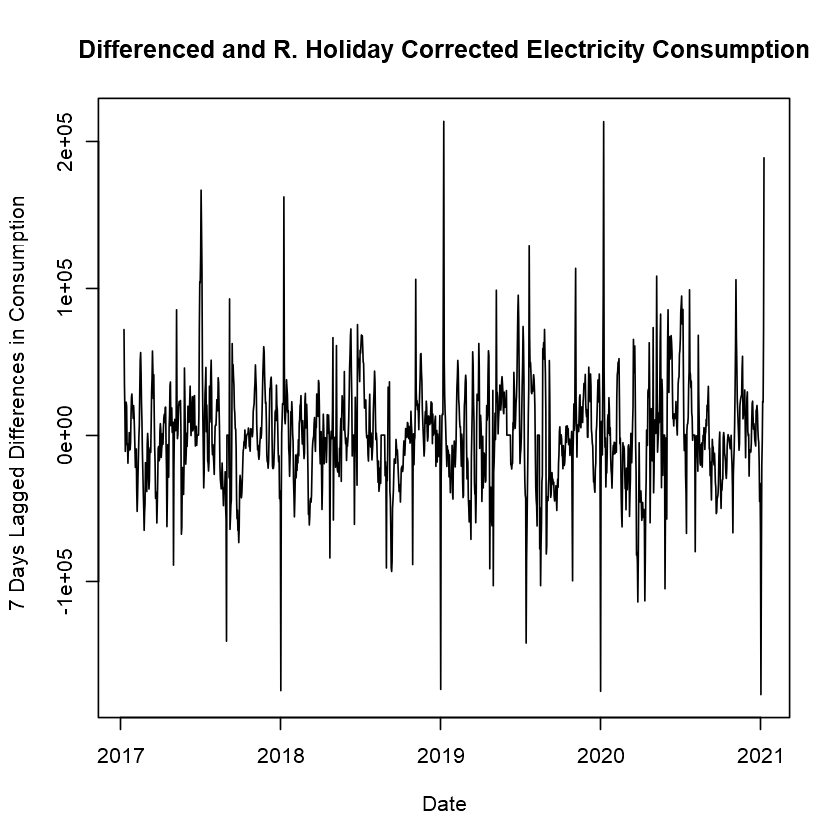

In [5]:
plot(x= dailycons[Date>="2017-01-08",Date], y=diff(dailycons[,DailyConsumption], lag = 7), type="l"
     , ylab="7 Days Lagged Differences in Consumption", xlab = "Date",
     main = "Differenced and R. Holiday Corrected Electricity Consumption")

<br>
The differenced series look more stationary. It moves around zero which is a good sign. However, down below, I tested the series with Box-Ljung test to see if it is stationary, but the p-value came up significantly low. I didn't know what could be done at this point. My thought was to move on to forecasting and if the values came up absurd I would come back to here and think about what could be done. However, as you will see, it didn't came up to that point.
<br><br>

In [6]:
Box.test(diff(dailycons$DailyConsumption, lag = 7), type="Ljung-Box", lag=7)


	Box-Ljung test

data:  diff(dailycons$DailyConsumption, lag = 7)
X-squared = 1452.2, df = 7, p-value < 2.2e-16


# 4. Building Models, Forecasting and Accuracy
<br>
Below, I have built three different models. The first is an autoregressive model with parameter 1, the second is a moving average with parameter also 1, lastly I utilized the auto.arima function to tweak the parameters and to find a suitable ARIMA model. Then, I predicted the wanted 15-days period using all three models separately and put transformed the difference values back into original values and put them all into the same data table.
<br><br>

In [7]:
forecastPeriod = seq.Date(from=as.Date("2021-01-09"), to=as.Date("2021-01-23"), by="day")
forecastPeriod = data.table(Date=forecastPeriod)

modelAR = arima(diff(dailycons$DailyConsumption,lag=7), order = c(1,0,0))
forecastAR = predict(modelAR, n.ahead = 15)$pred
forecastAR = as.numeric(forecastAR)
forecastPeriod[,ResultAR:=0]

forecastPeriod[Date==as.Date("2021-01-09"), ResultAR:=dailycons[Date==as.Date("2021-01-02"), DailyConsumption] + forecastAR[1]]
forecastPeriod[Date==as.Date("2021-01-10"), ResultAR:=dailycons[Date==as.Date("2021-01-03"), DailyConsumption] + forecastAR[2]]
forecastPeriod[Date==as.Date("2021-01-11"), ResultAR:=dailycons[Date==as.Date("2021-01-04"), DailyConsumption] + forecastAR[3]]
forecastPeriod[Date==as.Date("2021-01-12"), ResultAR:=dailycons[Date==as.Date("2021-01-05"), DailyConsumption] + forecastAR[4]]
forecastPeriod[Date==as.Date("2021-01-13"), ResultAR:=dailycons[Date==as.Date("2021-01-06"), DailyConsumption] + forecastAR[5]]
forecastPeriod[Date==as.Date("2021-01-14"), ResultAR:=dailycons[Date==as.Date("2021-01-07"), DailyConsumption] + forecastAR[6]]
forecastPeriod[Date==as.Date("2021-01-15"), ResultAR:=dailycons[Date==as.Date("2021-01-08"), DailyConsumption] + forecastAR[7]]
forecastPeriod[Date==as.Date("2021-01-16"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-09"), ResultAR] + forecastAR[8]]
forecastPeriod[Date==as.Date("2021-01-17"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-10"), ResultAR] + forecastAR[9]]
forecastPeriod[Date==as.Date("2021-01-18"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-11"), ResultAR] + forecastAR[10]]
forecastPeriod[Date==as.Date("2021-01-19"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-12"), ResultAR] + forecastAR[11]]
forecastPeriod[Date==as.Date("2021-01-20"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-13"), ResultAR] + forecastAR[12]]
forecastPeriod[Date==as.Date("2021-01-21"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-14"), ResultAR] + forecastAR[13]]
forecastPeriod[Date==as.Date("2021-01-22"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-15"), ResultAR] + forecastAR[14]]
forecastPeriod[Date==as.Date("2021-01-23"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-16"), ResultAR] + forecastAR[15]]

modelMA = arima(diff(dailycons$DailyConsumption,lag=7), order = c(0,0,1))
forecastMA = predict(modelMA, n.ahead = 15)$pred
forecastMA = as.numeric(forecastMA)
forecastPeriod[,ResultMA:=0]

forecastPeriod[Date==as.Date("2021-01-09"), ResultMA:=dailycons[Date==as.Date("2021-01-02"), DailyConsumption] + forecastMA[1]]
forecastPeriod[Date==as.Date("2021-01-10"), ResultMA:=dailycons[Date==as.Date("2021-01-03"), DailyConsumption] + forecastMA[2]]
forecastPeriod[Date==as.Date("2021-01-11"), ResultMA:=dailycons[Date==as.Date("2021-01-04"), DailyConsumption] + forecastMA[3]]
forecastPeriod[Date==as.Date("2021-01-12"), ResultMA:=dailycons[Date==as.Date("2021-01-05"), DailyConsumption] + forecastMA[4]]
forecastPeriod[Date==as.Date("2021-01-13"), ResultMA:=dailycons[Date==as.Date("2021-01-06"), DailyConsumption] + forecastMA[5]]
forecastPeriod[Date==as.Date("2021-01-14"), ResultMA:=dailycons[Date==as.Date("2021-01-07"), DailyConsumption] + forecastMA[6]]
forecastPeriod[Date==as.Date("2021-01-15"), ResultMA:=dailycons[Date==as.Date("2021-01-08"), DailyConsumption] + forecastMA[7]]
forecastPeriod[Date==as.Date("2021-01-16"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-09"), ResultMA] + forecastMA[8]]
forecastPeriod[Date==as.Date("2021-01-17"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-10"), ResultMA] + forecastMA[9]]
forecastPeriod[Date==as.Date("2021-01-18"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-11"), ResultMA] + forecastMA[10]]
forecastPeriod[Date==as.Date("2021-01-19"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-12"), ResultMA] + forecastMA[11]]
forecastPeriod[Date==as.Date("2021-01-20"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-13"), ResultMA] + forecastMA[12]]
forecastPeriod[Date==as.Date("2021-01-21"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-14"), ResultMA] + forecastMA[13]]
forecastPeriod[Date==as.Date("2021-01-22"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-15"), ResultMA] + forecastMA[14]]
forecastPeriod[Date==as.Date("2021-01-23"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-16"), ResultMA] + forecastMA[15]]


modelARIMA = auto.arima(diff(dailycons$DailyConsumption, lag = 7))
forecastARIMA = predict(modelARIMA, n.ahead = 15)$pred
forecastARIMA = as.numeric(forecastARIMA)
forecastPeriod[,ResultARIMA:=0]

forecastPeriod[Date==as.Date("2021-01-09"), ResultARIMA:=dailycons[Date==as.Date("2021-01-02"), DailyConsumption] + forecastARIMA[1]]
forecastPeriod[Date==as.Date("2021-01-10"), ResultARIMA:=dailycons[Date==as.Date("2021-01-03"), DailyConsumption] + forecastARIMA[2]]
forecastPeriod[Date==as.Date("2021-01-11"), ResultARIMA:=dailycons[Date==as.Date("2021-01-04"), DailyConsumption] + forecastARIMA[3]]
forecastPeriod[Date==as.Date("2021-01-12"), ResultARIMA:=dailycons[Date==as.Date("2021-01-05"), DailyConsumption] + forecastARIMA[4]]
forecastPeriod[Date==as.Date("2021-01-13"), ResultARIMA:=dailycons[Date==as.Date("2021-01-06"), DailyConsumption] + forecastARIMA[5]]
forecastPeriod[Date==as.Date("2021-01-14"), ResultARIMA:=dailycons[Date==as.Date("2021-01-07"), DailyConsumption] + forecastARIMA[6]]
forecastPeriod[Date==as.Date("2021-01-15"), ResultARIMA:=dailycons[Date==as.Date("2021-01-08"), DailyConsumption] + forecastARIMA[7]]
forecastPeriod[Date==as.Date("2021-01-16"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-09"), ResultARIMA] + forecastARIMA[8]]
forecastPeriod[Date==as.Date("2021-01-17"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-10"), ResultARIMA] + forecastARIMA[9]]
forecastPeriod[Date==as.Date("2021-01-18"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-11"), ResultARIMA] + forecastARIMA[10]]
forecastPeriod[Date==as.Date("2021-01-19"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-12"), ResultARIMA] + forecastARIMA[11]]
forecastPeriod[Date==as.Date("2021-01-20"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-13"), ResultARIMA] + forecastARIMA[12]]
forecastPeriod[Date==as.Date("2021-01-21"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-14"), ResultARIMA] + forecastARIMA[13]]
forecastPeriod[Date==as.Date("2021-01-22"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-15"), ResultARIMA] + forecastARIMA[14]]
forecastPeriod[Date==as.Date("2021-01-23"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-16"), ResultARIMA] + forecastARIMA[15]]

forecastPeriod

Date,ResultAR,ResultMA,ResultARIMA
2021-01-09,863987.0,815198.3,863874.9
2021-01-10,820396.6,720870.0,820199.0
2021-01-11,925766.4,853468.1,925503.9
2021-01-12,934198.2,881667.6,933886.4
2021-01-13,930864.5,892685.2,930515.3
2021-01-14,923259.4,895499.2,922882.0
2021-01-15,905479.0,885283.0,905080.2
2021-01-16,879000.9,815507.8,878473.9
2021-01-17,831423.6,721179.5,830799.0
2021-01-18,933898.9,853777.6,933200.3


In [8]:
modelARIMA
modelAR
modelMA

Series: diff(dailycons$DailyConsumption, lag = 7) 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.7261
s.e.  0.0183

sigma^2 estimated as 641464012:  log likelihood=-16898.5
AIC=33801.01   AICc=33801.02   BIC=33811.58


Call:
arima(x = diff(dailycons$DailyConsumption, lag = 7), order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.7260   463.2474
s.e.  0.0183  2412.4042

sigma^2 estimated as 6.41e+08:  log likelihood = -16898.47,  aic = 33802.94


Call:
arima(x = diff(dailycons$DailyConsumption, lag = 7), order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.5848   309.4488
s.e.  0.0155  1179.9781

sigma^2 estimated as 810897014:  log likelihood = -17070.18,  aic = 34146.35

<br>
Surprisingly, auto.arima function decided that order (1,0,0) is the best option which is autoregressive model with parameter 1.
<br><br>

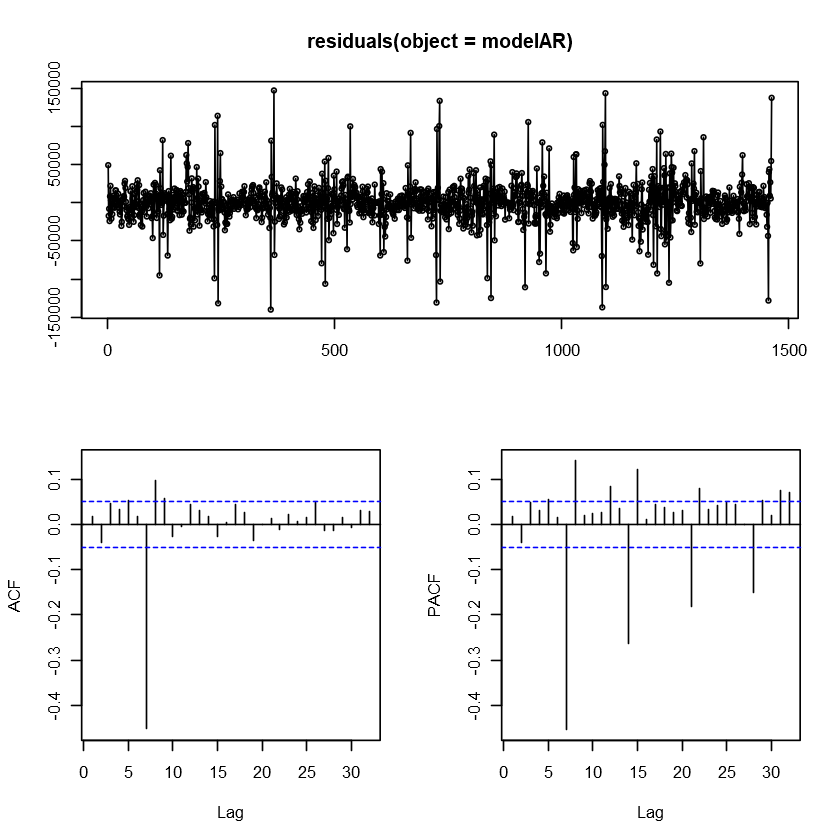

In [9]:
tsdisplay(residuals(object = modelAR))

Autocorrelation function of the residuals show correlation in 7th lag. So i will add a seasonal (0,0,7) order on the autoregressive model.

In [10]:
modelAR4 = arima(diff(dailycons$DailyConsumption,lag=7), order = c(1,0,0), seasonal = c(0,0,7))
forecastAR4 = predict(modelAR4, n.ahead = 15)$pred
forecastAR4 = as.numeric(forecastAR4)
forecastPeriod[,ResultAR4:=0]

forecastPeriod[Date==as.Date("2021-01-09"), ResultAR4:=dailycons[Date==as.Date("2021-01-02"), DailyConsumption] + forecastAR4[1]]
forecastPeriod[Date==as.Date("2021-01-10"), ResultAR4:=dailycons[Date==as.Date("2021-01-03"), DailyConsumption] + forecastAR4[2]]
forecastPeriod[Date==as.Date("2021-01-11"), ResultAR4:=dailycons[Date==as.Date("2021-01-04"), DailyConsumption] + forecastAR4[3]]
forecastPeriod[Date==as.Date("2021-01-12"), ResultAR4:=dailycons[Date==as.Date("2021-01-05"), DailyConsumption] + forecastAR4[4]]
forecastPeriod[Date==as.Date("2021-01-13"), ResultAR4:=dailycons[Date==as.Date("2021-01-06"), DailyConsumption] + forecastAR4[5]]
forecastPeriod[Date==as.Date("2021-01-14"), ResultAR4:=dailycons[Date==as.Date("2021-01-07"), DailyConsumption] + forecastAR4[6]]
forecastPeriod[Date==as.Date("2021-01-15"), ResultAR4:=dailycons[Date==as.Date("2021-01-08"), DailyConsumption] + forecastAR4[7]]
forecastPeriod[Date==as.Date("2021-01-16"), ResultAR4:=forecastPeriod[Date==as.Date("2021-01-09"), ResultAR4] + forecastAR4[8]]
forecastPeriod[Date==as.Date("2021-01-17"), ResultAR4:=forecastPeriod[Date==as.Date("2021-01-10"), ResultAR4] + forecastAR4[9]]
forecastPeriod[Date==as.Date("2021-01-18"), ResultAR4:=forecastPeriod[Date==as.Date("2021-01-11"), ResultAR4] + forecastAR4[10]]
forecastPeriod[Date==as.Date("2021-01-19"), ResultAR4:=forecastPeriod[Date==as.Date("2021-01-12"), ResultAR4] + forecastAR4[11]]
forecastPeriod[Date==as.Date("2021-01-20"), ResultAR4:=forecastPeriod[Date==as.Date("2021-01-13"), ResultAR4] + forecastAR4[12]]
forecastPeriod[Date==as.Date("2021-01-21"), ResultAR4:=forecastPeriod[Date==as.Date("2021-01-14"), ResultAR4] + forecastAR4[13]]
forecastPeriod[Date==as.Date("2021-01-22"), ResultAR4:=forecastPeriod[Date==as.Date("2021-01-15"), ResultAR4] + forecastAR4[14]]
forecastPeriod[Date==as.Date("2021-01-23"), ResultAR4:=forecastPeriod[Date==as.Date("2021-01-16"), ResultAR4] + forecastAR4[15]]

As it can be seen below the new model's residuals almost don't show any significant correlation in lags and it has a lower AIC value than the models above. Also, the residual plot look more stationary with less deviation.


Call:
arima(x = diff(dailycons$DailyConsumption, lag = 7), order = c(1, 0, 0), seasonal = c(0, 
    0, 7))

Coefficients:
         ar1    sma1    sma2    sma3    sma4    sma5    sma6     sma7
      0.6091  0.2202  0.1772  0.2076  0.2236  0.1946  0.2050  -0.7529
s.e.  0.0480  0.0371  0.0392  0.0348  0.0359  0.0364  0.0355   0.0361
      intercept
       382.8205
s.e.  1913.2891

sigma^2 estimated as 376174040:  log likelihood = -16518.66,  aic = 33057.33

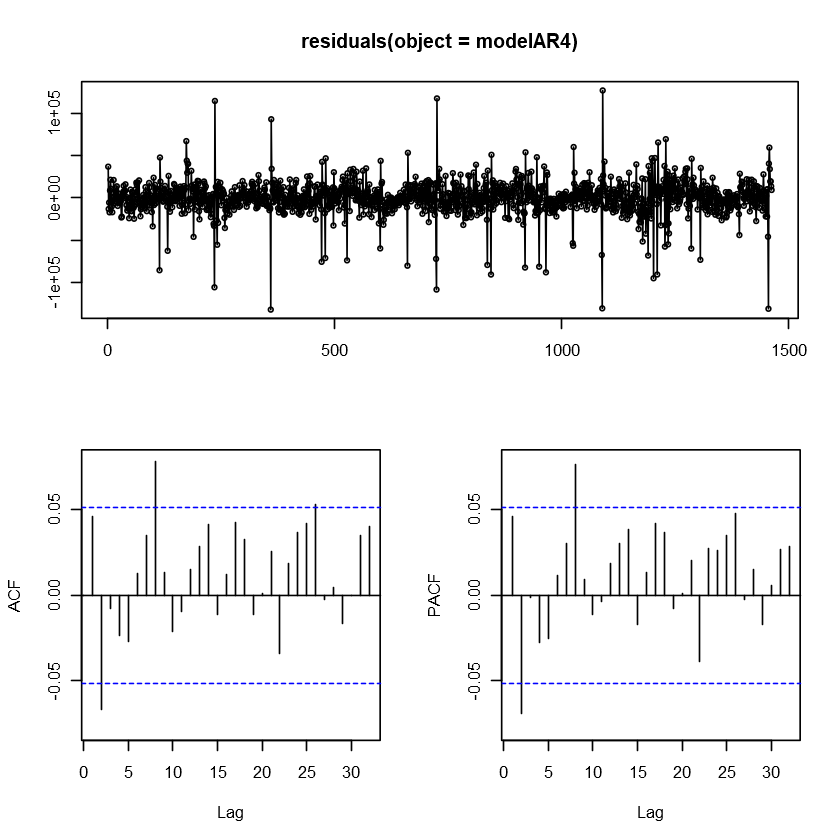

In [11]:
modelAR4
tsdisplay(residuals(object = modelAR4))

<br>
In below, the observed consumption values for the forecasting period is read from a .csv file and put into the same data table.
<br><br>

In [12]:
observed = fread("RealTimeConsumption2.csv")
colnames(observed) = c("Date", "Hour", "Consumption")

observed[,Date:=as.Date(observed[,Date], format = "%d.%m.%Y")]
observed[,Consumption:=gsub(',','',Consumption)]
observed[,Consumption:=as.numeric(observed[,Consumption])]
observed = observed[, list(ObservedConsumption=sum(Consumption)), by = list(Date)]
forecastPeriod[,ObservedConsumption:=observed$ObservedConsumption]

forecastPeriod

Date,ResultAR,ResultMA,ResultARIMA,ResultAR4,ObservedConsumption
2021-01-09,863987.0,815198.3,863874.9,842998.3,834757.5
2021-01-10,820396.6,720870.0,820199.0,766402.9,764205.6
2021-01-11,925766.4,853468.1,925503.9,868367.4,874355.1
2021-01-12,934198.2,881667.6,933886.4,884973.8,885551.9
2021-01-13,930864.5,892685.2,930515.3,884668.1,897836.9
2021-01-14,923259.4,895499.2,922882.0,882364.3,913345.3
2021-01-15,905479.0,885283.0,905080.2,870431.1,916089.2
2021-01-16,879000.9,815507.8,878473.9,834289.6,856016.3
2021-01-17,831423.6,721179.5,830799.0,761247.9,781391.0
2021-01-18,933898.9,853777.6,933200.3,865377.0,922749.3


<br>
Below, I plotted all three forecasts (AR, MA, seasonal AR) and the observed values. I also calculated the overall accuracies of the models. s it can be seen on the plot below it captured the movement in the data quite well.
<br><br>

,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
AR,15,886842.9,60014.33,-0.01781387,0.03400952,32998.95,29314.01,0.03305434
MA,15,886842.9,60014.33,0.04475179,0.04465262,45357.96,39687.80,0.04475179
ARIMA,15,886842.9,60014.33,-0.01720658,0.03392093,32890.22,29259.94,0.03299338
seasonal AR,15,886842.9,60014.33,0.03666173,0.03684280,43084.72,33904.94,0.03823105


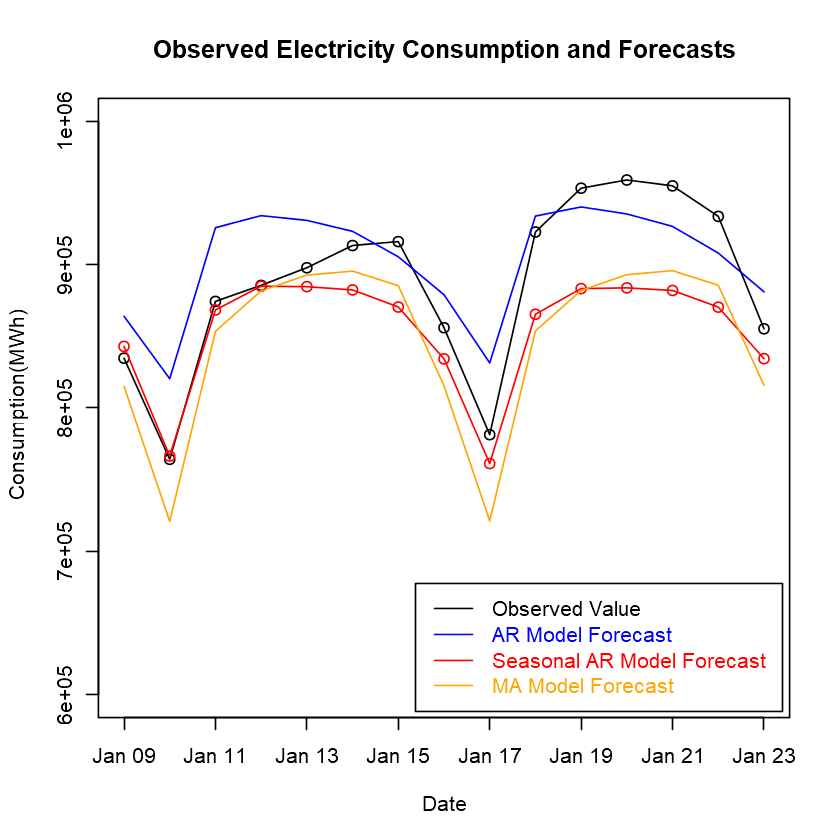

In [13]:
plot(x = forecastPeriod$Date, y=forecastPeriod$ObservedConsumption, col="black", type="o", ylim=c(600000,1000000),
     main = "Observed Electricity Consumption and Forecasts", xlab="Date", ylab="Consumption(MWh)")
lines(x = forecastPeriod$Date,y=forecastPeriod$ResultAR, col="blue")
lines(x = forecastPeriod$Date,y=forecastPeriod$ResultAR4, col="red", type="o")
lines(x = forecastPeriod$Date,y=forecastPeriod$ResultMA, col="orange")
# lines(x = forecastPeriod$Date,y=forecastPeriod$ResultARIMA, col="darkgreen")
legend("bottomright", col = c("black", "blue", "red", "orange"), text.col = c("black", "blue", "red", "orange")
       , legend = c("Observed Value", "AR Model Forecast", "Seasonal AR Model Forecast", "MA Model Forecast"),
       inset = c(0.01, 0.01), lty = c(1,1,1,1))

accu = function(actual, forecast){
    n = length(actual)
    error = actual - forecast
    mean = mean(actual)
    sd = sd(actual)
    FBias = sum(error)/sum(actual)
    MAPE = sum(abs(error/actual)) / n
    RMSE = sqrt(sum(error^2) / n)
    MAD = sum(abs(error)) / n
    WMAPE = MAD / mean
    l = data.frame(n, mean, sd, FBias, MAPE, RMSE, MAD, WMAPE)
    return(l)
}

accuracy = data.table(accu(forecastPeriod$ObservedConsumption, forecastPeriod$ResultAR))
rownames(accuracy) = "AR"
accuracy = rbind(accuracy, accu(forecastPeriod$ObservedConsumption, forecastPeriod$ResultMA))
accuracy = rbind(accuracy, accu(forecastPeriod$ObservedConsumption, forecastPeriod$ResultARIMA))
accuracy = rbind(accuracy, accu(forecastPeriod$ObservedConsumption, forecastPeriod$ResultAR4))
rownames(accuracy) = c("AR","MA","ARIMA", "seasonal AR")
accuracy



<br>
Below, I also provided the daily accuracies of the model. There some interesting facts. For example, moving average model underestimated every day. Autoregressive model overestimated at first then underestimated towards end. Also seasonal autoregressive model seems close with the moving average model which I think is dur to having seasonal moving average of order 7.
<br>
When it comes to mean absolute percentage error models' values seem pretty constant across days. Seasonal auto regressive model performed really well in the first week, however it was a bit off in the second week. This may be due to the unexpected temperature changes. 
<br><br>

In [14]:
# Note that AR4 is the seasonal autoregressive model

dailyAccuracy = data.table(Date=observed$Date)
dailyAccuracy[,AR_Daily_Bias:=0]
dailyAccuracy[,MA_Daily_Bias:=0]
dailyAccuracy[,AR4_Daily_Bias:=0]
dailyAccuracy[,AR_Daily_MAPE:=0]
dailyAccuracy[,MA_Daily_MAPE:=0]
dailyAccuracy[,AR4_Daily_MAPE:=0]

for(i in 1:15){
    dailyBiasAR = (forecastPeriod$ObservedConsumption[i] - forecastPeriod$ResultAR[i]) 
    dailyMAPEAR = abs(dailyBiasAR) / forecastPeriod$ObservedConsumption[i]
    dailyAccuracy[i,AR_Daily_Bias:=dailyBiasAR]
    dailyAccuracy[i,AR_Daily_MAPE:=dailyMAPEAR]
    
    dailyBiasMA = (forecastPeriod$ObservedConsumption[i] - forecastPeriod$ResultMA[i]) 
    dailyMAPEMA = abs(dailyBiasMA) / forecastPeriod$ObservedConsumption[i]
    dailyAccuracy[i,MA_Daily_Bias:=dailyBiasMA]
    dailyAccuracy[i,MA_Daily_MAPE:=dailyMAPEMA]
    
    dailyBiasAR4 = (forecastPeriod$ObservedConsumption[i] - forecastPeriod$ResultAR4[i]) 
    dailyMAPEAR4 = abs(dailyBiasAR4) / forecastPeriod$ObservedConsumption[i]
    dailyAccuracy[i,AR4_Daily_Bias:=dailyBiasAR4]
    dailyAccuracy[i,AR4_Daily_MAPE:=dailyMAPEAR4]
}

dailyAccuracy
dailyAccuracy

Date,AR_Daily_Bias,MA_Daily_Bias,AR4_Daily_Bias,AR_Daily_MAPE,MA_Daily_MAPE,AR4_Daily_MAPE
2021-01-09,-29229.528,19559.158,-8240.7845,0.03501559,0.023430947,0.0098720704
2021-01-10,-56190.958,43335.581,-2197.3070,0.07352858,0.056706702,0.0028752825
2021-01-11,-51411.276,20886.991,5987.6815,0.05879908,0.023888453,0.0068481118
2021-01-12,-48646.369,3884.211,578.0244,0.05493339,0.004386204,0.0006527279
2021-01-13,-33027.597,5151.671,13168.7555,0.03678574,0.005737870,0.0146672029
2021-01-14,-9914.174,17846.061,30980.9173,0.01085479,0.019539228,0.0339202694
2021-01-15,10610.119,30806.151,45658.0455,0.01158197,0.033627896,0.0498401766
2021-01-16,-22984.579,40508.540,21726.6604,0.02685063,0.047322159,0.0253811293
2021-01-17,-50032.585,60211.492,20143.1034,0.06403015,0.077056804,0.0257785201
2021-01-18,-11149.603,68971.722,57372.3273,0.01208303,0.074745896,0.0621754229


# 5. Conclusion
<br>
In this homework, I have manipulated the Turkey's electric consumption data and manually rearranged the data in the necessary times. I have made efforts to make the data as stationary as possible. After that, I have built autoregressive, moving average and seasonal auto regressive models to the manipulated data and forecasted the 9 January 2021 and 23 January 2021 period with all three models and evaluated their performances. Considering the overall all three models performed well with relatively low WMAPE values.